In [474]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import time
import datetime
import random
import io
import folium
from dgraph import *
from numpy import random as np_random
from scipy.spatial import distance_matrix
from collections import defaultdict


In [475]:
df = pd.read_csv('data.csv')
df.head()

,City,Lattitude,Longitude
0,Islamabad,33.6989,73.0369
1,Lahore,31.5497,74.3436
2,Karachi,24.8600,67.0100
3,Peshawar,34.0000,71.5000
4,Hyderabad,25.3792,68.3683


In [476]:
#HERE I CALCULATE THE  min/max lang/lat values
values =(df.Longitude.min(), df.Lattitude.min(), df.Longitude.max(), df.Lattitude.max())

values


(66.975, 24.86, 74.3436, 34.0)

In [477]:
#HERE I USED FOLIUM TO CREATE A MAP WHICH PLACES THE VALUES IN THE DATASET ON THE MAP
x  = []
y = []
for i in range(8):
        x.append(np_random.uniform(24.86, 34.0, size=1))
        y.append(np_random.uniform(67.01,74.3436,size=1))

map = folium.Map(location=[df.Lattitude.mean(), df.Longitude.mean()], zoom_start=12,control_scale=True)
#folium place markers
for lat, lng, label in zip(df.Lattitude, df.Longitude, df.City):
    folium.Marker(location=[lat, lng], popup=label, marker_color='red').add_to(map)
map


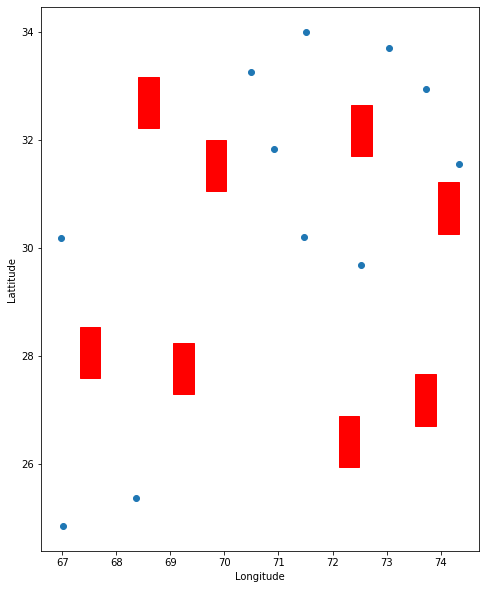

In [478]:
#THIS IS A BASIC PLOT OF THE POints
#plot the lang and lat
plt.figure(figsize=(10,10))
plt.scatter(df.Longitude, df.Lattitude)
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
#obs_4_x = [6.5, 8, 8, 6.5, 6.5]
#obs_4_y = [6, 6, 9.5, 9.5, 6]
#plt.fill(obs_4_x, obs_4_y, "r")


rectangle = plt.Rectangle((69.05499773,27.30419314), 0.38, 0.95, fc='red',ec="red")
#use y[1] and x[1] to get the coordinates of the rectangle
rectangle2 = plt.Rectangle((68.40579368,32.2244921), 0.38,0.95 , fc='red',ec="red")
#use y[2] and x[2] to get the coordinates of the rectangle
rectangle3 = plt.Rectangle((73.95673648,30.2707003), 0.38, 0.95, fc='red',ec="red")
#use y[3] and x[3] to get the coordinates of the rectangle
rectangle4 = plt.Rectangle((69.65336426,31.05971192), 0.38, 0.95, fc='red',ec="red")
#use y[4] and x[4] to get the coordinates of the rectangle
rectangle5 = plt.Rectangle((73.52528668,26.72029817), 0.38, 0.95, fc='red',ec="red")
#use y[5] and x[5] to get the coordinates of the rectangle
rectangle6 = plt.Rectangle((72.34731228,31.6979375), 0.38, 0.95, fc='red',ec="red")
#use y[6] and x[6] to get the coordinates of the rectangle
rectangle7 = plt.Rectangle((67.32759484,27.59375763), 0.38, 0.95, fc='red',ec="red")
#use y[7] and x[7] to get the coordinates of the rectangle
rectangle8 = plt.Rectangle((72.11769889,25.95242895), 0.38, 0.95, fc='red',ec="red")
#use y[8] and x[8] to get the coordinates of the rectangle


plt.gca().add_patch(rectangle)
plt.gca().add_patch(rectangle2)
plt.gca().add_patch(rectangle3)
plt.gca().add_patch(rectangle4)
plt.gca().add_patch(rectangle5)
plt.gca().add_patch(rectangle6)
plt.gca().add_patch(rectangle7)
plt.gca().add_patch(rectangle8)


plt.axis('scaled')
plt.show()





In [479]:
#calculate distance between each langitute and lattitude point
#calculate distance between each points and save in array
counter = 0
distances = []
cities =[]
for i in range(len(df)):
    cities.append(df.City[i])
print(cities)
data = []
for i in range(len(df)):
    l2 = [df.iloc[i].Longitude, df.iloc[i].Lattitude]
    #print(l2)
    data.append(l2)
print(data)
df = pd.DataFrame(data, columns=['xcord', 'ycord'], index=cities)
dist_m = pd.DataFrame(distance_matrix(df.values, df.values), index=df.index, columns=df.index)
dist_m.to_csv('dist_m.csv')









['Islamabad', 'Lahore', 'Karachi', 'Peshawar', 'Hyderabad', 'Jehlum', 'Multan', 'Shewa', 'Quetta', 'Dera Ismail Khan', 'Cholistan']
[[73.0369, 33.6989], [74.3436, 31.5497], [67.01, 24.86], [71.5, 34.0], [68.3683, 25.3792], [73.7276, 32.9405], [71.4711, 30.1978], [70.496744, 33.2536611], [66.975, 30.1798], [70.911518, 31.831832], [72.5232, 29.6928]]


In [480]:
islamabad = 0
lahore = 1
karachi=2
peshawar=3
hyderabad=4
jhelum=5
multan=6
shewa=7
quetta=8
dera_ismail_khan=9
cholistan=10

            #0  1  2  3  4  5  6  7  8  9 10
path_mat = [[0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0], #1
            [0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1], #1
            [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], #2
            [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0], #3
            [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0], #4
            [1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0], #5    
            [1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0], #6
            [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0], #7
            [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], #8
            [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1], #9
            [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]] #10
            

In [481]:


             #0  1  2  3  4  5  6  7  8  9 10
ist_mat =   [[0, 0, 0, 1.5661, 0, 1.0258, 3.8353, 0, 0, 0, 0],    #0
            [0, 0, 0, 0, 0, 1.5211, 0, 0, 0, 3.4437, 2.6004],     #1
            [0, 0, 0, 0, 1.4541, 0, 0, 0, 5.3199, 0, 0],          #2
            [1.5661, 0, 0, 0, 0, 0, 3.8023, 0, 5.9219, 0, 0],     #3
            [0, 0, 1.4541, 0, 0, 0, 0, 0, 0, 6.9357, 0],          #4
            [1.0258, 1.5211, 0, 0, 0, 0, 3.5516, 0, 0, 0, 0],     #5 
            [3.8353, 0, 0, 3.8023, 0, 3.5516, 0, 3.2074, 0, 0, 0],#6
            [0, 0, 0, 0, 0, 0, 3.2074, 0, 4.6745, 1.4810, 0],     #7
            [0, 0, 5.3199, 5.9219, 0, 0, 0, 4.6745, 0, 0, 0],     #8
            [0, 3.4437, 0, 0, 0, 0, 0, 1.4811, 0, 0, 2.6782],     #9
            [0, 2.6004, 0, 0, 0, 0, 0, 0, 0, 2.6782, 0] ]         #10






In [482]:

class Graph:
 
    def __init__(self, vertices):
        # No. of vertices
        self.V = vertices 
        self.paths = []
        # default dictionary to store graph
        self.graph = defaultdict(list) 
 
    # function to add an edge to graph
    def addEdge(self, u, v):
        self.graph[u].append(v)
 
    '''A recursive function to print all paths from 'u' to 'd'.
    visited[] keeps track of vertices in current path.
    path[] stores actual vertices and path_index is current
    index in path[]'''
    def printAllPathsUtil(self, u, d, visited, path):

        # Mark the current node as visited and store in path
        visited[u]= True
        path.append(u)

        # If current vertex is same as destination, then print
        # current path[]
        if u == d:
            print (path)
            l2 = path
            self.paths.append(l2.copy())
        else:
            # If current vertex is not destination
            # Recur for all the vertices adjacent to this vertex
            for i in self.graph[u]:
                if visited[i]== False:
                    self.printAllPathsUtil(i, d, visited, path)
                    
        # Remove current vertex from path[] and mark it as unvisited
        path.pop()
        visited[u]= False
 
 
    # Prints all paths from 's' to 'd'
    def printAllPaths(self, s, d):

        # Mark all the vertices as not visited
        visited =[False]*(self.V)

        # Create an array to store paths
        path = []

        # Call the recursive helper function to print all paths
        self.printAllPathsUtil(s, d, visited, path)
        print (path)
        

In [483]:
distancegraph = Graph(11)  
distancegraph.addEdge(0,3)
distancegraph.addEdge(0,5)
distancegraph.addEdge(0,6)
distancegraph.addEdge(1,5)
distancegraph.addEdge(1,9)
distancegraph.addEdge(1,10)
distancegraph.addEdge(2,4)
distancegraph.addEdge(2,8)
distancegraph.addEdge(3,0)
distancegraph.addEdge(3,6)
distancegraph.addEdge(3,8)
distancegraph.addEdge(4,2)
distancegraph.addEdge(4,9)
distancegraph.addEdge(5,0)
distancegraph.addEdge(5,1)
distancegraph.addEdge(5,6)
distancegraph.addEdge(6,0)
distancegraph.addEdge(6,3)
distancegraph.addEdge(6,5)
distancegraph.addEdge(6,7)
distancegraph.addEdge(7,6)
distancegraph.addEdge(7,8)
distancegraph.addEdge(7,9)
distancegraph.addEdge(8,2)
distancegraph.addEdge(8,3)
distancegraph.addEdge(8,7)
distancegraph.addEdge(9,1)
distancegraph.addEdge(9,7)
distancegraph.addEdge(9,10)
distancegraph.addEdge(10,1)
distancegraph.addEdge(10,9)
distancegraph.printAllPaths(1,8)
distancegraph.paths

[1, 5, 0, 3, 6, 7, 8]
[1, 5, 0, 3, 8]
[1, 5, 0, 6, 3, 8]
[1, 5, 0, 6, 7, 8]
[1, 5, 6, 0, 3, 8]
[1, 5, 6, 3, 8]
[1, 5, 6, 7, 8]
[1, 9, 7, 6, 0, 3, 8]
[1, 9, 7, 6, 3, 8]
[1, 9, 7, 6, 5, 0, 3, 8]
[1, 9, 7, 8]
[1, 10, 9, 7, 6, 0, 3, 8]
[1, 10, 9, 7, 6, 3, 8]
[1, 10, 9, 7, 6, 5, 0, 3, 8]
[1, 10, 9, 7, 8]
[]


[[1, 5, 0, 3, 6, 7, 8],
 [1, 5, 0, 3, 8],
 [1, 5, 0, 6, 3, 8],
 [1, 5, 0, 6, 7, 8],
 [1, 5, 6, 0, 3, 8],
 [1, 5, 6, 3, 8],
 [1, 5, 6, 7, 8],
 [1, 9, 7, 6, 0, 3, 8],
 [1, 9, 7, 6, 3, 8],
 [1, 9, 7, 6, 5, 0, 3, 8],
 [1, 9, 7, 8],
 [1, 10, 9, 7, 6, 0, 3, 8],
 [1, 10, 9, 7, 6, 3, 8],
 [1, 10, 9, 7, 6, 5, 0, 3, 8],
 [1, 10, 9, 7, 8]]

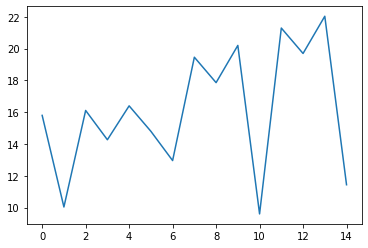

In [484]:
#fitness list calculated by adding weights

fitness_list = []
temp = []
sum = 0
for i in range(len(distancegraph.paths)):
  for j in range(len(distancegraph.paths[i])-1):
    x = distancegraph.paths[i][j]
    y = distancegraph.paths[i][j+1]
    sum = sum + ist_mat[x][y]
    x =0
    y = 0
  fitness_list.append(sum)
  sum = 0


fitness_list

#plot fitness_list
plt.plot(fitness_list)



In [485]:
fitness_list

#finding max fitness value path
max_value = max(fitness_list)
max_index = fitness_list.index(max_value)

min_value = min(fitness_list)
min_index = fitness_list.index(min_value)

a = distancegraph.paths[min_index]
temp_fitness_list = fitness_list
pre_fitness_list = fitness_list.copy()

temp_fitness_list[min_index] = 1000

second_min_value = min(temp_fitness_list)
second_min_index = temp_fitness_list.index(second_min_value)



b = distancegraph.paths[second_min_index]

In [486]:
print ("Best path or parent(having fitness value or distance = ",a)
print ("fitness value = ", min_value)
print ("Second best path or parent(having second best fitness value or distance = ",b)
print ("fitness value = ", second_min_value)

Best path or parent(having fitness value or distance =  [1, 9, 7, 8]
fitness value =  9.5993
Second best path or parent(having second best fitness value or distance =  [1, 5, 0, 3, 8]
fitness value =  10.0349


In [487]:
parent1 = list(a)
parent2 = list(b)


parent1
parent2

[1, 5, 0, 3, 8]

In [488]:
flag = 0
list1_as_set = set(parent1)
intersection = list1_as_set.intersection(parent2)

if intersection != []:
  intersection_as_list = list(intersection)
else:
  random_intersection_point = random.choice(parent1)
  flag = 1

print(intersection_as_list)

[8, 1]


In [489]:
if flag ==1:
    final_intersection_point = random_intersection_point
else:
    final_intersection_point = random.choice(intersection_as_list)

final_intersection_point

1

In [490]:
parent1 = np.array(parent1)
parent2 = np.array(parent2)



In [491]:
def single_point_crossover(parent1,parent2,final_intersection_point):
      child1 = np.append(parent1[:final_intersection_point] , parent2[final_intersection_point:])
      child2 = np.append(parent2[:final_intersection_point] , parent1[final_intersection_point:])
      return child1

child1 = single_point_crossover(parent1 , parent2 , final_intersection_point)
print(child1)


[1 5 0 3 8]


In [492]:
#converting child1 to list
child1_list = child1.tolist()

child1_list

[1, 5, 0, 3, 8]

In [493]:
# checking if the new child is present in the population or not
def Updating_population(child1_list):
        check = False
        for i in range(len(distancegraph.paths)):
            if child1_list == distancegraph.paths[i]:
                check = True
                break
            else:
                check = False 

        #Updating the population after the Crossover e.g putting new child in population
        if check == False:
            distancegraph.paths[max_index] = child1_list


Updating_population(child1_list)
print("population updated after Crossover.")


population updated after Crossover.


In [494]:
#mutation done

def mutation (chromosome):
    mutated_chromosome = chromosome
    mutated_chromosome[random.randint(0,len(mutated_chromosome))] = random.randint(0,7)
    return mutated_chromosome

random_index = random.randint(0,7)
unmutated_chromosome = distancegraph.paths[random_index]
distancegraph.paths[random_index] = mutation(unmutated_chromosome)




IndexError: list assignment index out of range

[15.797199999999998,
 10.0349,
 16.1064,
 14.264100000000001,
 16.396,
 14.7969,
 12.954600000000001,
 19.4555,
 17.8564,
 20.1976,
 21.2904,
 19.691300000000002,
 22.032500000000002,
 11.4342]

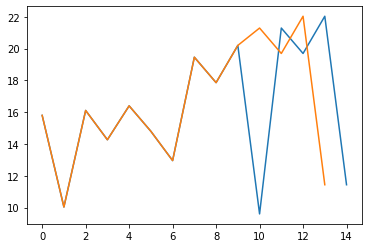

In [ ]:
#plot all the paths in distancegraph paths
#remove 1000 from fitness list
fitness_list.remove(1000)
plt.plot(pre_fitness_list)
plt.plot(fitness_list)

fitness_list